<a href="https://colab.research.google.com/github/chandan9t8/UnivProjects/blob/main/Anime%20Recommendation%20System/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series

In [ ]:
#Import both the anime and rating csv's
anime = pd.read_csv('/content/drive/MyDrive/Project/anime.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Project/rating.csv')

In [ ]:
#Checking for null values in our anime database
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [ ]:
anime.index.size
ratings.index.size

7813737

In [ ]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [ ]:
#Cleaning the null values from the Anime dataframe
anime.dropna(axis = 0, inplace = True)

In [ ]:
#Show nulls have been removed
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [ ]:
#Re-indexing the anime based on position in the anime df
i=0
anime_ids = {}
for index,row in anime.iterrows():
    anime_ids[row['anime_id']] = i
    i = i + 1

anime['anime_id'] = anime['anime_id'].map(anime_ids)
ratings['anime_id'] = ratings['anime_id'].map(anime_ids)

In [ ]:
#We need to remove the -1's so as not to throw off the model calculations, however we want to retain the fact that users
#have watched certain shows, even if they're unrated, so we won't drop them, but they will have to be handled later.

#Instead we check for null values
ratings.isnull().sum()

user_id       0
anime_id    126
rating        0
dtype: int64

In [ ]:
#Save the newly cleaned anime database and ratings database
anime.to_csv('cleaned_anime.csv')
ratings.to_csv('cleaned_ratings.csv')

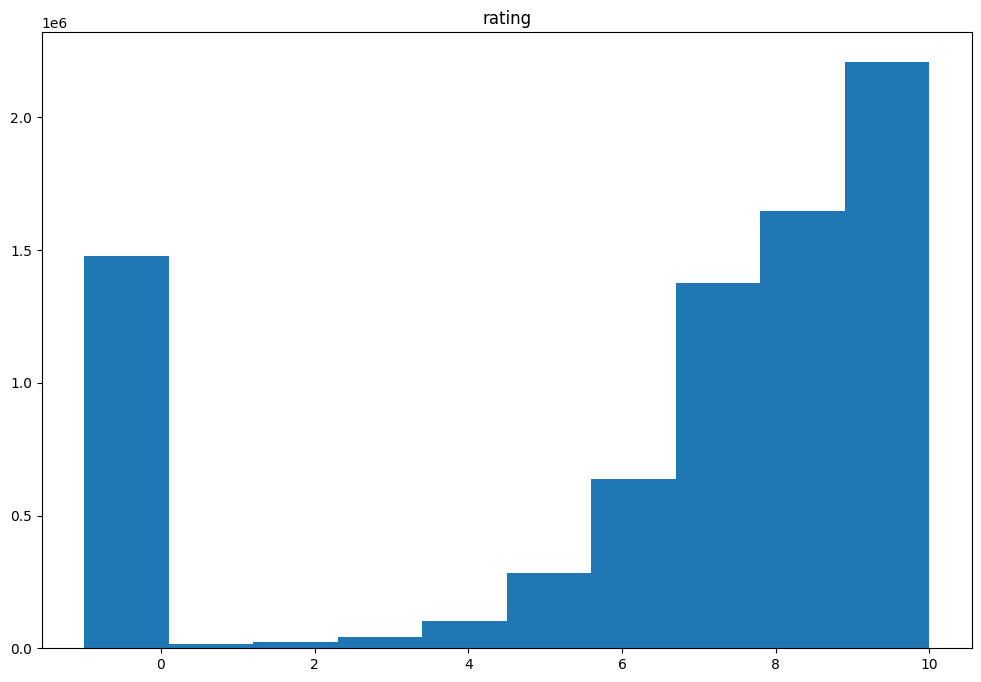

In [ ]:
#Show a distribution of ratings given by users for all shows
ax = ratings.hist(column='rating', bins = 10, grid=False,  figsize=(12,8))

<Axes: title={'center': 'type'}>

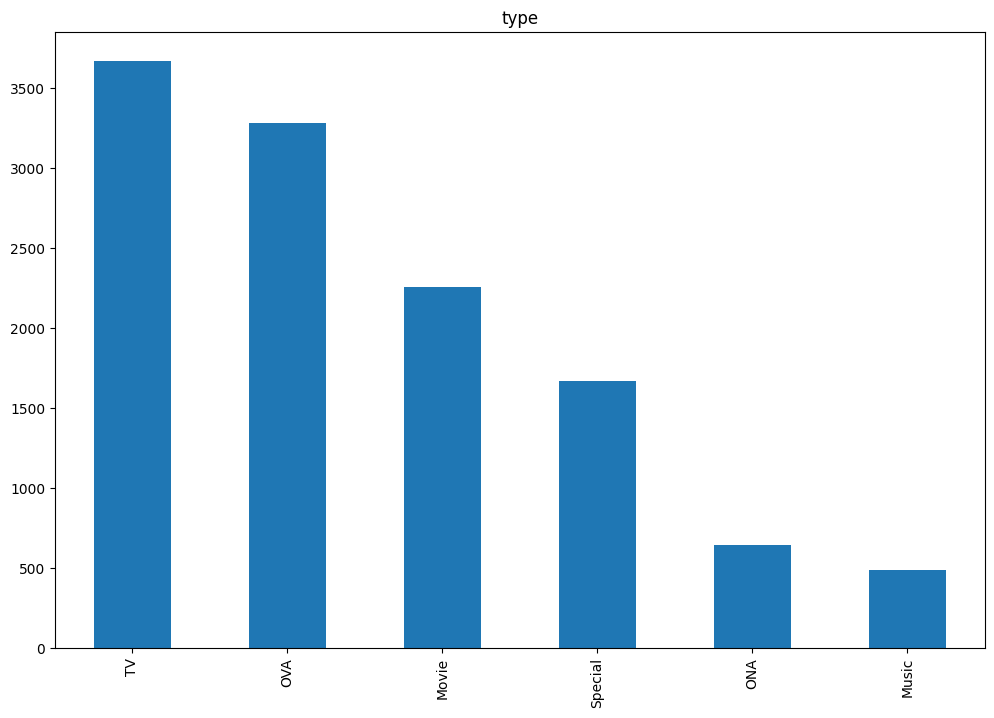

In [ ]:
#Show the distribution of media format amongst all media
anime.type.value_counts().plot(kind='bar', figsize=(12,8), title='type')

In [ ]:
vc = anime['episodes'].value_counts()
vc.head()

1     5571
2     1075
12     810
13     571
26     514
Name: episodes, dtype: int64

In [ ]:
vc = anime['episodes'].value_counts()
vc.head()

1     5571
2     1075
12     810
13     571
26     514
Name: episodes, dtype: int64